# Week 2: Implementing Callbacks in TensorFlow using the MNIST Dataset

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy and stops once this threshold is achieved. In the lecture you saw how this was done for the loss but here you will be using accuracy instead.

Some notes:
1. Your network should succeed in less than 9 epochs.
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!" and stop training.
3. If you add any additional variables, make sure you use the same names as the ones used in the class. This is important for the function signatures (the parameters and names) of the callbacks.

In [1]:
import os
import tensorflow as tf
from tensorflow import keras

## Load and inspect the data

Begin by loading the data. A couple of things to notice:

- The file `mnist.npz` is already included in the current workspace under the `data` directory. By default the `load_data` from Keras accepts a path relative to `~/.keras/datasets` but in this case it is stored somewhere else, as a result of this, you need to specify the full path.

- `load_data` returns the train and test sets in the form of the tuples `(x_train, y_train), (x_test, y_test)` but in this exercise you will be needing only the train set so you can ignore the second tuple.

In [2]:
import os

try:
    test_dir = os.path.join("C:\\", "test_directory")
    os.makedirs(test_dir, exist_ok=True)
    print(f"Successfully created directory: {test_dir}")
    # Remove the test directory after creation
    os.rmdir(test_dir)
except Exception as e:
    print(f"Failed to create directory: {e}")


Successfully created directory: C:\test_directory


In [3]:
# Load the data

# Get current working directory
current_dir = os.getcwd()

# Create folder if it doesn't exist
data_dir = os.path.join(current_dir, "data")
if not os.path.exists(data_dir):
    os.makedirs(data_dir, exist_ok=True)

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(data_dir, "mnist.npz")

# Discard test set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path=data_path)
        
# Normalize pixel values
x_train = x_train / 255.0

Now take a look at the shape of the training data:

In [4]:
data_shape = x_train.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

There are 60000 examples with shape (28, 28)


In [5]:
data_shape

(60000, 28, 28)

In [26]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Defining your callback

Now it is time to create your own custom callback. For this complete the `myCallback` class and the `on_epoch_end` method in the cell below. If you need some guidance on how to proceed, check out this [link](https://www.tensorflow.org/guide/keras/custom_callback).

In [6]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

### END CODE HERE

## Create and train your model

Now that you have defined your callback it is time to complete the `train_mnist` function below. 

**You must set your model to train for 10 epochs and the callback should fire before the 9th epoch for you to pass this assignment.**

**Hint:**
- Feel free to try the architecture for the neural network that you see fit but in case you need extra help you can check out an architecture that works pretty well at the end of this notebook.

In [23]:
# GRADED FUNCTION: train_mnist
def train_mnist(x_train, y_train):

    ### START CODE HERE
    
    # Instantiate the callback class
    callbacks = myCallback()
    
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks], validation_split=0.2, batch_size=32)

    ### END CODE HERE

    return history, model

Call the `train_mnist` passing in the appropiate parameters to get the training history:

In [24]:
# Disable device placement logging
#tf.debugging.set_log_device_placement(False)

# Set logging level to WARNING to avoid detailed logs
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all logs, 1 = INFO, 2 = WARNING, 3 = ERROR

hist, model = train_mnist(x_train, y_train)

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2146 - accuracy: 0.9321 - val_loss: 0.0607 - val_accuracy: 0.9824
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.0409 - val_accuracy: 0.9887
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0389 - val_accuracy: 0.9892
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 6/10
1497/1500 [============================>.] - ETA: 0s - loss: 0.0284 - accuracy: 0.9908
Reached 99% accuracy so cancelling training!
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0408 - val_accuracy: 0.989

In [11]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [92]:
print(tf.__version__)

2.10.0


If you see the message `Reached 99% accuracy so cancelling training!` printed out after less than 9 epochs it means your callback worked as expected. 

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 27.6649 - accuracy: 0.9591

Test accuracy: 0.9591000080108643


```python
313/313 [==============================] - 0s 1ms/step - loss: 13.2002 - accuracy: 0.9799

Test accuracy: 0.9799000024795532


313/313 [==============================] - 1s 3ms/step - loss: 17.4858 - accuracy: 0.9774

Test accuracy: 0.977400004863739

313/313 [==============================] - 1s 3ms/step - loss: 58.2867 - accuracy: 0.9327

Test accuracy: 0.932699978351593

313/313 [==============================] - 1s 3ms/step - loss: 6.6990 - accuracy: 0.9882

Test accuracy: 0.9882000088691711

313/313 [==============================] - 1s 3ms/step - loss: 8.0372 - accuracy: 0.9898

Test accuracy: 0.989799976348877

```

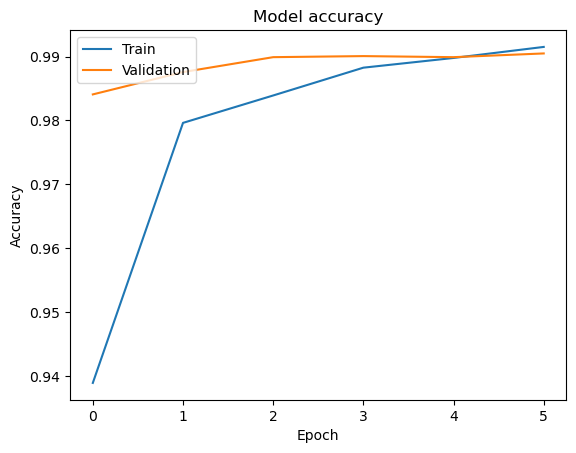

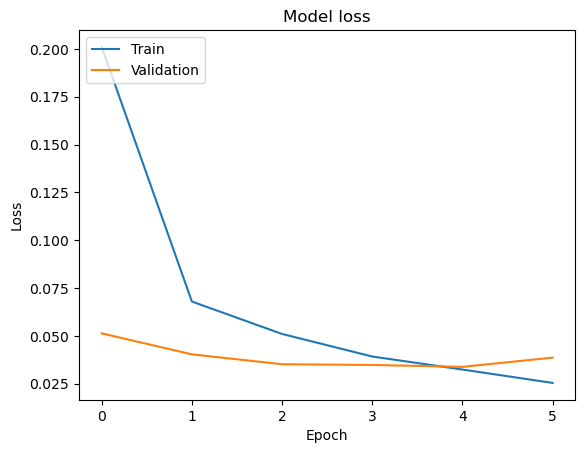

In [22]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

epochs = range(len(hist.history['accuracy']))

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)  # Set x-axis ticks to be whole numbers
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(epochs)  # Set x-axis ticks to be whole numbers
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Need more help?

Run the following cell to see an architecture that works well for the problem at hand:

In [91]:
# WE STRONGLY RECOMMEND YOU TO TRY YOUR OWN ARCHITECTURES FIRST
# AND ONLY RUN THIS CELL IF YOU WISH TO SEE AN ANSWER

import base64

encoded_answer = "CiAgIC0gQSBGbGF0dGVuIGxheWVyIHRoYXQgcmVjZWl2ZXMgaW5wdXRzIHdpdGggdGhlIHNhbWUgc2hhcGUgYXMgdGhlIGltYWdlcwogICAtIEEgRGVuc2UgbGF5ZXIgd2l0aCA1MTIgdW5pdHMgYW5kIFJlTFUgYWN0aXZhdGlvbiBmdW5jdGlvbgogICAtIEEgRGVuc2UgbGF5ZXIgd2l0aCAxMCB1bml0cyBhbmQgc29mdG1heCBhY3RpdmF0aW9uIGZ1bmN0aW9uCg=="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)


   - A Flatten layer that receives inputs with the same shape as the images
   - A Dense layer with 512 units and ReLU activation function
   - A Dense layer with 10 units and softmax activation function



**Congratulations on finishing this week's assignment!**

You have successfully implemented a callback that gives you more control over the training loop for your model. Nice job!

**Keep it up!**